# Axes Detection

This code gives a best estimate of the x and y axis (horizontal and vertical axes) for the plot/chart.

In [1]:
%matplotlib inline
import cv2, imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path
from matplotlib import rcParams

In [2]:
# Directory of images to run the code on
img_dir = '../bar_charts'

# Directory to save the output images
save_dir = '../out'

### Method to detect x and y axis

In [3]:
def findMaxConsecutiveOnes(nums) -> int:
    count = maxCount = 0
    
    for i in range(len(nums)):
        if nums[i] == 1:
            count += 1
        else:
            maxCount =  __builtins__.max(count, maxCount)
            count = 0
                
    return max(count, maxCount)

In [4]:
def detectAxes(filepath, threshold=None, debug=False):
    if filepath is None:
        return None, None
    
    if threshold is None:
        threshold = 10
    
    image = cv2.imread(filepath)
    height, width, channels = image.shape
    print(height, width)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get the max-consecutive-ones for eah column in the bw image, and...
    # pick the "first" index that fall in [max - threshold, max + threshold]
    maxConsecutiveOnes = [findMaxConsecutiveOnes(gray[:, idx] < 200) for idx in range(width)]
    start_idx, maxindex, maxcount = 0, 0, max(maxConsecutiveOnes)
    while start_idx < width:
        if abs(maxConsecutiveOnes[start_idx] - maxcount) <= threshold:
            maxindex = start_idx
            break
            
        start_idx += 1
           
    yaxis = (maxindex, 0, maxindex, height)
    
    if debug:
        fig, ax = plt.subplots(1, 2)

        ax[0].imshow(image)

        ax[1].plot(maxConsecutiveOnes, color = 'k')
        ax[1].axhline(y = max(maxConsecutiveOnes) - 10, color = 'r', linestyle = 'dashed')
        ax[1].axhline(y = max(maxConsecutiveOnes) + 10, color = 'r', linestyle = 'dashed')
        ax[1].vlines(x = maxindex, ymin = 0.0, ymax = maxConsecutiveOnes[maxindex], color = 'b', linewidth = 4)

        plt.show()

    # Get the max-consecutive-ones for eah row in the bw image, and...
    # pick the "last" index that fall in [max - threshold, max + threshold]
    maxConsecutiveOnes = [findMaxConsecutiveOnes(gray[idx, :] < 200) for idx in range(height)]
    start_idx, maxindex, maxcount = 0, 0, max(maxConsecutiveOnes)
    while start_idx < height:
        if abs(maxConsecutiveOnes[start_idx] - maxcount) <= threshold:
            maxindex = start_idx
            
        start_idx += 1
            
    cv2.line(image, (0, maxindex), (width, maxindex),  (255, 0, 0), 2)
    xaxis = (0, maxindex, width, maxindex)
    
    if debug:
        rcParams['figure.figsize'] = 15, 8

        fig, ax = plt.subplots(1, 1)
        ax.imshow(image, aspect = 'auto')
        
    return xaxis, yaxis

In [5]:
for path in Path(img_dir).iterdir():
    filepath = img_dir + "/" + path.name
    image = cv2.imread(filepath)
    xaxis, yaxis = detectAxes(filepath)

    for (x1, y1, x2, y2) in [xaxis]:
        cv2.line(image, (x1, y1), (x2, y2),  (0, 0, 255), 2)

    for (x1, y1, x2, y2) in [yaxis]:
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    cv2.imwrite(save_dir + '/' + ''.join(path.name.split(".")[:-1]) + "_axes.png", image)

830 947


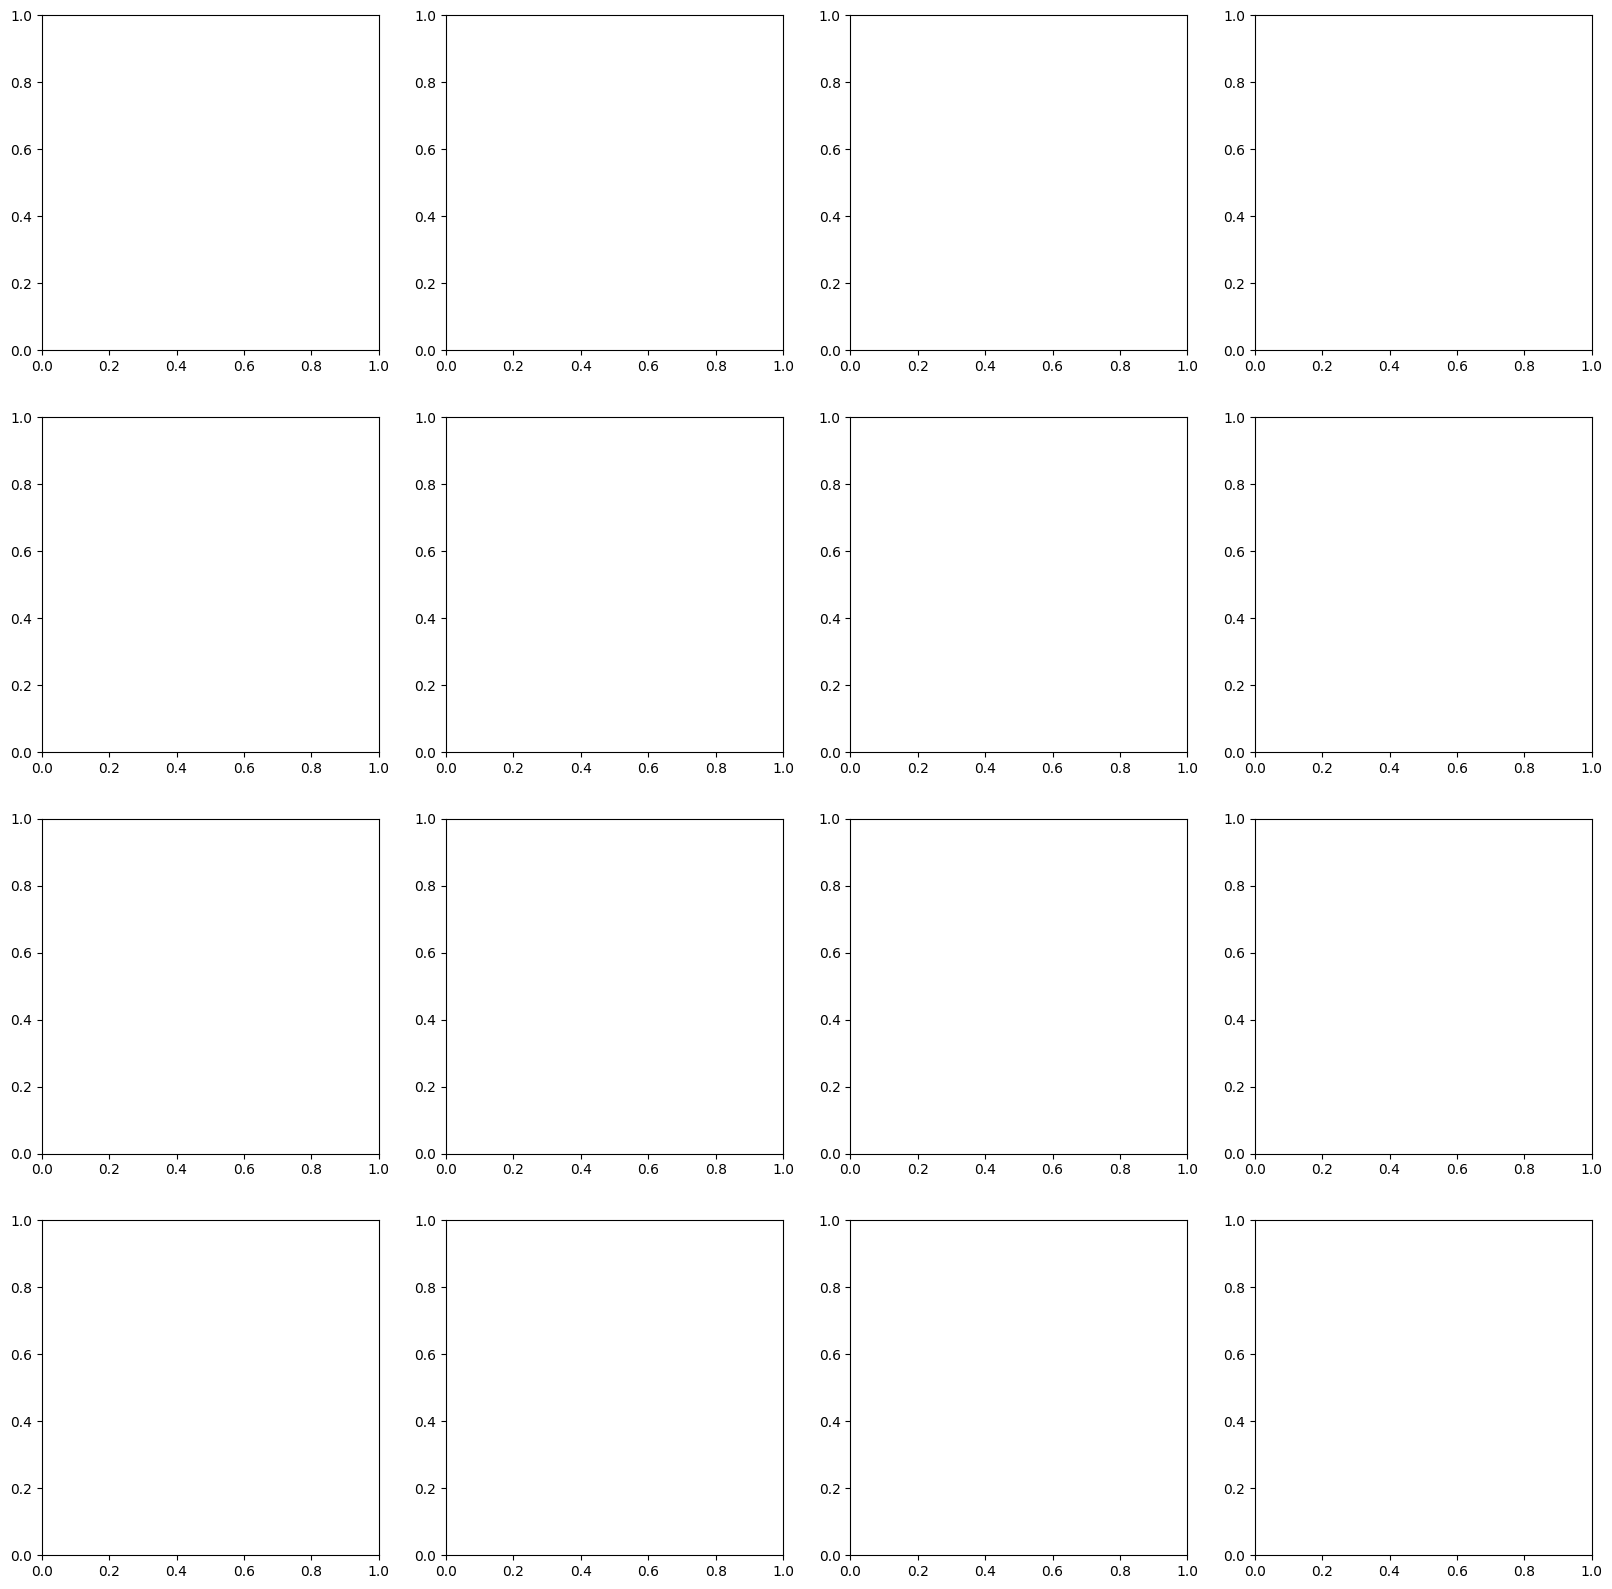

In [6]:
badplots = []

bad_dir = "C:/Users/catz1/LocalDocuments/ChartReader-master/out/bad"

for path in Path(bad_dir).iterdir():
    badplots.append(path.name)

f, ax = plt.subplots(4, 4, figsize = (20, 20))

for index in range(len(badplots)):
    print(badplots[index])
    ax[index // 4, index % 4].imshow(mpimg.imread("./out/bad/" + badplots[index]))
    ax[index // 4, index % 4].axis('off')
    ax[index // 4, index % 4].set_aspect('equal')
    
plt.show()